In [1]:
library('ggplot2')
library('plyr')
library('tidyr')
library('parallel')
source('ss_analysis.R')

Loading required package: RJSONIO

Attaching package: 'reshape'

The following objects are masked from 'package:tidyr':

    expand, smiths

The following objects are masked from 'package:plyr':

    rename, round_any

Loading required package: fit.models
Loading required package: lattice
Loading required package: MASS
Loading required package: robustbase
Loading required package: rrcov
Scalable Robust Estimators with High Breakdown Point (version 1.3-11)



# Cross-Linguistic Correlations

### Google 1T

In [2]:
languages = c('ENGLISH',"SPANISH",'FRENCH', 'DUTCH', 'GERMAN','SWEDISH','CZECH','POLISH','ROMANIAN','ITALIAN','PORTUGUESE')
withoutEndMarker = lapply(languages, function(language){getScoresForLanguage('results', 'Google1T','25000',language, endMarker=F,  corMethod='spearman', opusFilter=T)})

[1] "original number in ENGLISH: 49905"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in ENGLISH: 25000"
[1] "Getting correlations"
 [1] "word"                      "opusCount"                
 [3] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
 [5] "frequency"                 "numContexts"              
 [7] "retrievalTime"             "index"                    
 [9] "ipa"                       "ipa_ss_array"             
[11] "ipa_ss"                    "ipa_n"                    
[13] "ortho"                     "ortho_ss_array"           
[15] "ortho_ss"                  "ortho_n"                  
[17] "character"                 "character_ss_array"       
[19] "character_ss"              "character_n"              
[21] "log_ortho_n"               "endMarker"                
[23] "trigramSurprisal"          "prob"                     
[25] "unigramSurprisal"          "log_ipa_n"                
[27] "log_character_n"           "language"              

### Corpus Sizes

In [3]:
g1t_corpusCounts = do.call('rbind',lapply(withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language= language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
g1t_corpusCounts

language,numTokens,numTokens_pretty,analysisCount
English,266164702912,"266,164,702,912",25000
Spanish,30898286985,"30,898,286,985",25000
French,27912351558,"27,912,351,558",25000
Dutch,24127675184,"24,127,675,184",25000
German,18753615866,"18,753,615,866",25000
Swedish,20544242586,"20,544,242,586",25000
Czech,16238032967,"16,238,032,967",25000
Polish,17915063215,"17,915,063,215",25000
Romanian,19659866198,"19,659,866,198",25000
Italian,26020955264,"26,020,955,264",25000


In [43]:
nem = do.call('rbind', lapply(withoutEndMarker, function(x){x$score}))
nem = subset(nem, sv %in% c('ipa_ss', 'ipa_n','character_ss','ortho_n'))
nem$sv = factor(nem$sv)
#Better word-level metric names
levels(nem$sv)[levels(nem$sv)=="ipa_ss"] = "PIC - Phonemes"
levels(nem$sv)[levels(nem$sv)=="ipa_n"] = "Number of Phonemes"
levels(nem$sv)[levels(nem$sv)=="character_ss"] = "PIC - Characters"
levels(nem$sv)[levels(nem$sv)=="ortho_n"] = "Number of Characters"

nem$lv[nem$lv =="unigramSurprisal"] = "Unigram Surprisal"
nem$lv[nem$lv=="trigramSurprisal"] = "Trigram Surprisal"
nem$lv[nem$lv=="frequency"] = "Frequency"

nem = merge(nem,g1t_corpusCounts, by='language')
nem$sv = factor(nem$sv, levels=c('PIC - Phonemes','Number of Phonemes',"PIC - Characters","Number of Characters"))
nem$lv = factor(nem$lv, levels=c("Unigram Surprisal","Trigram Surprisal", "Frequency"))
nem$language = as.factor(sapply(nem$language, simpleCap))
nem$languageCount = sapply(1:length(nem$language), function(x){paste0(nem$language[x], ' (', round(nem$numTokens[x] / 1000000000,0),'b)' )})
nem$sv_lv = paste(nem$sv, nem$lv, sep='-')

### Google Books 2012

In [5]:
books2012_languages = c('eng-all',"spa-all",'fre-all','ger-all','rus-all','heb-all', 'ita-all')
books2012_withoutEndMarker = lapply(books2012_languages, function(language){getScoresForLanguage('results','GoogleBooks2012','25000', language, endMarker=F,  corMethod='spearman', contextLimit=0, opusFilter=T)})
names(books2012_withoutEndMarker) = books2012_languages

[1] "original number in eng-all: 49942"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in eng-all: 25000"
[1] "Getting correlations"
 [1] "word"                      "opusCount"                
 [3] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
 [5] "frequency"                 "numContexts"              
 [7] "retrievalTime"             "index"                    
 [9] "ipa"                       "ipa_ss_array"             
[11] "ipa_ss"                    "ipa_n"                    
[13] "ortho"                     "ortho_ss_array"           
[15] "ortho_ss"                  "ortho_n"                  
[17] "character"                 "character_ss_array"       
[19] "character_ss"              "character_n"              
[21] "log_ortho_n"               "endMarker"                
[23] "trigramSurprisal"          "prob"                     
[25] "unigramSurprisal"          "log_ipa_n"                
[27] "log_character_n"           "language"              

### Corpus Sizes

In [6]:
gb12_corpusCounts = do.call('rbind',lapply(books2012_withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language = language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
gb12_corpusCounts

,language,numTokens,numTokens_pretty,analysisCount
eng-all,Eng-all,219341628008,"219,341,628,008",25000
spa-all,Spa-all,35702125629,"35,702,125,629",25000
fre-all,Fre-all,41935191569,"41,935,191,569",25000
ger-all,Ger-all,16156137843,"16,156,137,843",25000
rus-all,Rus-all,11969108346,"11,969,108,346",25000
heb-all,Heb-all,2732185984,"2,732,185,984",25000
ita-all,Ita-all,12856363174,"12,856,363,174",25000


In [23]:
books2012.nem = do.call('rbind', lapply(books2012_withoutEndMarker, function(x){x$score}))
books2012.nem = subset(books2012.nem, sv %in% c('ipa_ss', 'ipa_n','character_ss','ortho_n'))

books2012.nem$sv = factor(books2012.nem$sv)
levels(books2012.nem$sv)[levels(books2012.nem$sv) =="ipa_ss"] = "PIC - Phonemes"
levels(books2012.nem$sv)[levels(books2012.nem$sv) =="ipa_n"] = "Number of Phonemes"
levels(books2012.nem$sv)[levels(books2012.nem$sv) =="character_ss"] = "PIC - Characters"
levels(books2012.nem$sv)[levels(books2012.nem$sv) =="ortho_n"] = "Number of Characters"

books2012.nem$lv[books2012.nem$lv =="unigramSurprisal"] = "Unigram Surprisal"
books2012.nem$lv[books2012.nem$lv=="trigramSurprisal"] = "Trigram Surprisal"
books2012.nem$lv[books2012.nem$lv=="frequency"] = "Frequency"

books2012.nem = merge(books2012.nem,gb12_corpusCounts)
books2012.nem$sv = factor(books2012.nem$sv, levels=c('PIC - Phonemes','Number of Phonemes',"PIC - Characters","Number of Characters"))
books2012.nem$lv = factor(books2012.nem$lv, levels=c("Unigram Surprisal","Trigram Surprisal","Frequency"))
books2012.nem$language = as.factor(books2012.nem$language)
levels(books2012.nem$language) = c('English', 'French','German','Hebrew','Italian', 'Russian', 'Spanish')
books2012.nem$languageCount = sapply(1:length(books2012.nem$language), function(x){paste0(books2012.nem$language[x], ' (', round(books2012.nem$numTokens[x] / 1000000000,0),'b)' )})
books2012.nem$sv_lv = paste(books2012.nem$sv, books2012.nem$lv, sep='-')

### OPUS

In [8]:
opus_languages = c('en','ru','he','de','fr','es','cs','pt', 'pl','ro','sv','it','nl')
opus_withoutEndMarker = lapply(1:length(opus_languages), function(i){getScoresForLanguage('results','OPUS','25000',opus_languages[i], endMarker=F,  corMethod='spearman', opusFilter=T)})
names(opus_withoutEndMarker) = opus_languages

[1] "original number in en: 49900"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in en: 25000"
[1] "Getting correlations"
 [1] "word"                      "opusCount"                
 [3] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
 [5] "frequency"                 "numContexts"              
 [7] "retrievalTime"             "index"                    
 [9] "ipa"                       "ipa_ss_array"             
[11] "ipa_ss"                    "ipa_n"                    
[13] "ortho"                     "ortho_ss_array"           
[15] "ortho_ss"                  "ortho_n"                  
[17] "character"                 "character_ss_array"       
[19] "character_ss"              "character_n"              
[21] "log_ortho_n"               "endMarker"                
[23] "trigramSurprisal"          "prob"                     
[25] "unigramSurprisal"          "log_ipa_n"                
[27] "log_character_n"           "language"                 
[1] "o

### Corpus Sizes

In [9]:
opus_corpusCounts = do.call('rbind',lapply(opus_withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language= language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
opus_corpusCounts

,language,numTokens,numTokens_pretty,analysisCount
en,English,329906086,"329,906,086",25000
ru,Russian,42950666,"42,950,666",25000
he,Hebrew,65088282,"65,088,282",25000
de,German,39409031,"39,409,031",25000
fr,French,169303943,"169,303,943",25000
es,Spanish,197811726,"197,811,726",25000
cs,Czech,94730204,"94,730,204",25000
pt,Portuguese,105486083,"105,486,083",25000
pl,Polish,66770062,"66,770,062",25000
ro,Romanian,133902571,"133,902,571",25000


In [10]:
opus.nem = do.call('rbind', lapply(opus_withoutEndMarker, function(x){x$score}))
opus.nem = subset(opus.nem, sv %in% c('ipa_ss', 'ipa_n','character_ss','ortho_n'))
#opus.nem$sv = factor(opus.nem$sv, levels=c('ipa_ss','character_ss','ipa_n','ortho_n'))
#Better word-level metric names
opus.nem$sv = factor(opus.nem$sv)
levels(opus.nem$sv)[levels(opus.nem$sv)=="ipa_ss"] = "PIC - Phonemes"
levels(opus.nem$sv)[levels(opus.nem$sv)=="ipa_n"] = "Number of Phonemes"
levels(opus.nem$sv)[levels(opus.nem$sv)=="character_ss"] = "PIC - Characters"
levels(opus.nem$sv)[levels(opus.nem$sv)=="ortho_n"] = "Number of Characters"

opus.nem$lv = factor(opus.nem$lv)
levels(opus.nem$lv)[levels(opus.nem$lv)=="unigramSurprisal"] = "Unigram Surprisal"
levels(opus.nem$lv)[levels(opus.nem$lv)=="trigramSurprisal"] = "Trigram Surprisal"
levels(opus.nem$lv)[levels(opus.nem$lv)=="frequency"] = "Frequency"

opus.nem = merge(opus.nem,opus_corpusCounts, by='language')
opus.nem$sv = factor(opus.nem$sv, levels=c('PIC - Phonemes','Number of Phonemes',"PIC - Characters","Number of Characters"))
opus.nem$lv = factor(opus.nem$lv, levels=c("Unigram Surprisal","Trigram Surprisal","Frequency"))
opus.nem$language = as.factor(sapply(opus.nem$language, simpleCap))
opus.nem$languageCount = sapply(1:length(opus.nem$language), function(x){paste0(opus.nem$language[x], ' (', round(opus.nem$numTokens[x] / 1000000,0),'m)' )})

# Partial Correlations

### Google 1T

In [44]:
wordLengthPartialedOutScores = do.call('rbind',lapply(withoutEndMarker,function(language){partialCor(language,'ipa_ss','ipa_n')}))
wordLengthPartialedOutScores$sv = "Number of Phonemes"

ssPartialedOutScores = do.call('rbind',lapply(withoutEndMarker,function(language){partialCor(language,'ipa_n','ipa_ss')}))
ssPartialedOutScores$sv = "PIC - Phonemes"

char_wordLengthPartialedOutScores = do.call('rbind',lapply(withoutEndMarker,function(language){partialCor(language,'character_ss','ortho_n')}))
char_wordLengthPartialedOutScores$sv = "Number of Characters"

char_ssPartialedOutScores = do.call('rbind',lapply(withoutEndMarker,function(language){partialCor(language,'ortho_n','character_ss')}))
char_ssPartialedOutScores$sv = "PIC - Characters"

nem_unique = nem[!duplicated(nem$languageCount),]
partialsDF = merge(rbind(wordLengthPartialedOutScores, ssPartialedOutScores,char_wordLengthPartialedOutScores, char_ssPartialedOutScores), nem_unique[,c('language','languageCount')])
partialsDF$sv = factor(partialsDF$sv)

[1] "Processing language: English"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "24940 items after removing infinites"
[1] "Processing language: Spanish"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "24868 items after removing infinites"
[1] "Processing language: French"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "24860 items after removing infinites"
[1] "Processing language: Dutch"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "23859 items after removing infinites"
[1] "Processing language: German"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "23598 items after removing infinites"
[1] "Processing language: Swedish"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "21960 items after removing infinites"
[1] "Processing language: Czech"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "24283 items after removing infinites"
[1] "Processing language: Polish"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "24288 items after removing infinites"
[1] "Processing language: Romanian"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "24322 items after removing 

### Google Books 2012

In [45]:
gb12_wordLengthPartialedOutScores = do.call('rbind',lapply(books2012_withoutEndMarker,function(language){partialCor(language,'ipa_ss','ipa_n')}))
gb12_wordLengthPartialedOutScores$sv = "Number of Phonemes"

gb12_ssPartialedOutScores = do.call('rbind',lapply(books2012_withoutEndMarker,function(language){partialCor(language,'ipa_n','ipa_ss')}))
gb12_ssPartialedOutScores$sv = "PIC - Phonemes"

gb12_char_wordLengthPartialedOutScores = do.call('rbind',lapply(books2012_withoutEndMarker,function(language){partialCor(language,'character_ss','ortho_n')}))
gb12_char_wordLengthPartialedOutScores$sv = "Number of Characters"

gb12_char_ssPartialedOutScores = do.call('rbind',lapply(books2012_withoutEndMarker,function(language){partialCor(language,'ortho_n','character_ss')}))
gb12_char_ssPartialedOutScores$sv = "PIC - Characters"


gb_df = rbind(gb12_wordLengthPartialedOutScores, gb12_ssPartialedOutScores,gb12_char_wordLengthPartialedOutScores, gb12_char_ssPartialedOutScores)
gb_df$language =sapply(gb_df$language, function(x){gb12_langRemapper[[x]]})

books2012.nem_unique = books2012.nem[!duplicated(books2012.nem$languageCount),]
gb12_partialsDF = merge(gb_df, books2012.nem_unique[,c('language','languageCount')])
gb12_partialsDF$sv = factor(gb12_partialsDF$sv)

[1] "Processing language: Eng-all"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "24947 items after removing infinites"
[1] "Processing language: Spa-all"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "24880 items after removing infinites"
[1] "Processing language: Fre-all"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "23939 items after removing infinites"
[1] "Processing language: Ger-all"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "23527 items after removing infinites"
[1] "Processing language: Rus-all"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "24025 items after removing infinites"
[1] "Processing language: Heb-all"
[1] "Processing language: Ita-all"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "23441 items after removing infinites"
[1] "Processing language: Eng-all"
[1] "ipa_n"
[1] "ipa_ss"
[1] 25000
[1] "24947 items after removing infinites"
[1] "Processing language: Spa-all"
[1] "ipa_n"
[1] "ipa_ss"
[1] 25000
[1] "24880 items after removing infinites"
[1] "Processing language: Fre-all"
[1] "ipa_n"
[1] "ipa_ss"
[

### OPUS

In [46]:
opus_wordLengthPartialedOutScores = do.call('rbind',lapply(opus_withoutEndMarker,function(language){partialCor(language,'ipa_ss','ipa_n')}))
opus_wordLengthPartialedOutScores$sv = "Number of Phonemes"

opus_ssPartialedOutScores = do.call('rbind',lapply(opus_withoutEndMarker,function(language){partialCor(language,'ipa_n','ipa_ss')}))
opus_ssPartialedOutScores$sv = "PIC - Phonemes"

opus_char_wordLengthPartialedOutScores = do.call('rbind',lapply(opus_withoutEndMarker,function(language){partialCor(language,'character_ss','ortho_n')}))
opus_char_wordLengthPartialedOutScores$sv = "Number of Characters"

opus_char_ssPartialedOutScores = do.call('rbind',lapply(opus_withoutEndMarker,function(language){partialCor(language,'ortho_n','character_ss')}))
opus_char_ssPartialedOutScores$sv = "PIC - Characters"

opus_nem_unique = opus.nem[!duplicated(opus.nem$languageCount),]
opus_partialsDF = merge(rbind(opus_wordLengthPartialedOutScores, opus_ssPartialedOutScores,opus_char_wordLengthPartialedOutScores, opus_char_ssPartialedOutScores), opus_nem_unique[,c('language','languageCount')])
opus_partialsDF$sv = factor(opus_partialsDF$sv)

[1] "Processing language: English"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "24294 items after removing infinites"
[1] "Processing language: Russian"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "25000 items after removing infinites"
[1] "Processing language: Hebrew"
[1] "Processing language: German"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "25000 items after removing infinites"
[1] "Processing language: French"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "24998 items after removing infinites"
[1] "Processing language: Spanish"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "25000 items after removing infinites"
[1] "Processing language: Czech"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "25000 items after removing infinites"
[1] "Processing language: Portuguese"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "24999 items after removing infinites"
[1] "Processing language: Polish"
[1] "ipa_ss"
[1] "ipa_n"
[1] 25000
[1] "25000 items after removing infinites"
[1] "Processing language: Romanian"
[1] "ipa_ss"
[1] "ipa_n"
[1]

In [47]:
opus_datasets = do.call('rbind',lapply(opus_withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
opus_datasets$dataset = 'OPUS'                      
                        
gb12_datasets = do.call('rbind',lapply(books2012_withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
gb12_datasets$dataset = 'GB12'

g1t_datasets = do.call('rbind',lapply(withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
g1t_datasets$dataset = 'G1T'

In [53]:
combined_datasets = rbind.fill(opus_datasets, gb12_datasets, g1t_datasets)
combined_datasets$dataset_language = paste0(combined_datasets$dataset, ': ', combined_datasets$language)
combined_datasets$sv_lv = paste0(combined_datasets$sv, '-', combined_datasets$lv)

nem$languageLabel = paste('1T:', nem$languageCount)
books2012.nem$languageLabel = paste('GB12:', books2012.nem$languageCount)
opus.nem$languageLabel = paste('OPUS:', opus.nem$languageCount)
nem$dataset = '1T'
books2012.nem$dataset = 'GB12'
opus.nem$dataset = 'OPUS'

partialsDF$languageLabel = paste('1T:', partialsDF$languageCount)
gb12_partialsDF$languageLabel = paste('GB12:', gb12_partialsDF$languageCount)
opus_partialsDF$languageLabel = paste('OPUS:', opus_partialsDF$languageCount)
partialsDF$dataset = '1T'
gb12_partialsDF$dataset = 'GB12'
opus_partialsDF$dataset = 'OPUS'

nem_combined = rbind.fill(nem, books2012.nem, opus.nem)
partialsDF_combined  = rbind.fill(partialsDF,gb12_partialsDF, opus_partialsDF)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


png 
  2

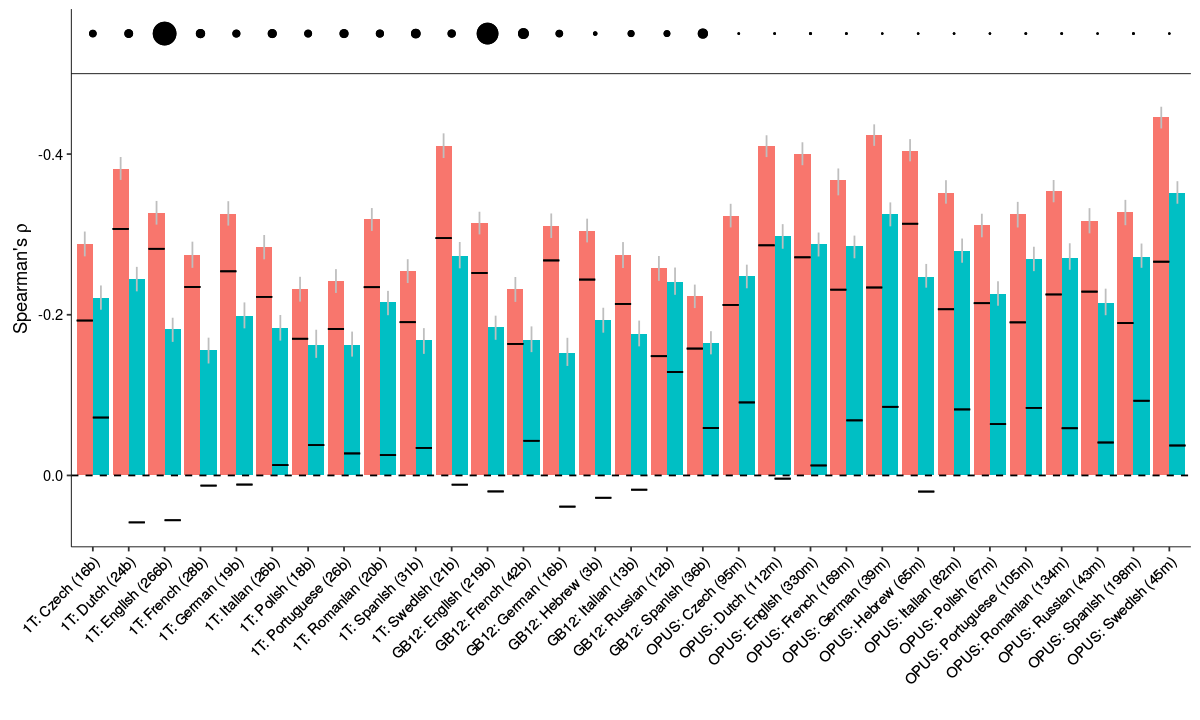

In [49]:
lv_list = c("Frequency")
sv_list = c("PIC - Characters","Number of Characters")
dodge <- position_dodge(width=0.9)
crosslinguistic_pic_characters = ggplot(subset(nem_combined, 
                                                     lv %in% lv_list &
                                                     sv %in% sv_list)
) + geom_bar(aes(x=languageLabel, y=singleCor, fill=sv),  stat='identity', position='dodge')  + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + geom_errorbar(aes(x=languageLabel, ymin=singleCor, ymax=singleCor, fill=sv), data= subset(partialsDF_combined, (lv %in% lv_list) & (sv %in% sv_list) ), position='dodge'
 ) + theme(panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), axis.line.x = element_line(color="black", size = .25),
    axis.line.y = element_line(color="black", size = .25)) + geom_hline(aes(yintercept = 0), linetype = 'dashed') + ylab(expression(paste("Spearman's ",rho))) + xlab(''
) +  theme(legend.position="none")  + geom_point(aes(x= languageLabel, y=-.55, size=numTokens)) + scale_size_area(
) + geom_hline(aes(yintercept = -.5), size=.25) +  geom_linerange(aes(x=languageLabel, 
ymin=lower, ymax=upper, fill=sv), position=dodge, colour='gray') + scale_y_continuous( breaks = seq(.1,-5,-.1)) + scale_y_reverse()


pdf('figures/crosslinguistic-pic-characters.pdf', width=10, height=5)
print(crosslinguistic_pic_characters)
dev.off()

options(repr.plot.width=10, repr.plot.height=6, jupyter.plot_mimetypes = 'image/png')
print(crosslinguistic_pic_characters)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
: Removed 4 rows containing missing values (geom_errorbar).Warning message:
: Removed 4 rows containing missing values (geom_linerange).

png 
  2

Warning message:
: Removed 4 rows containing missing values (geom_errorbar).Warning message:
: Removed 4 rows containing missing values (geom_linerange).

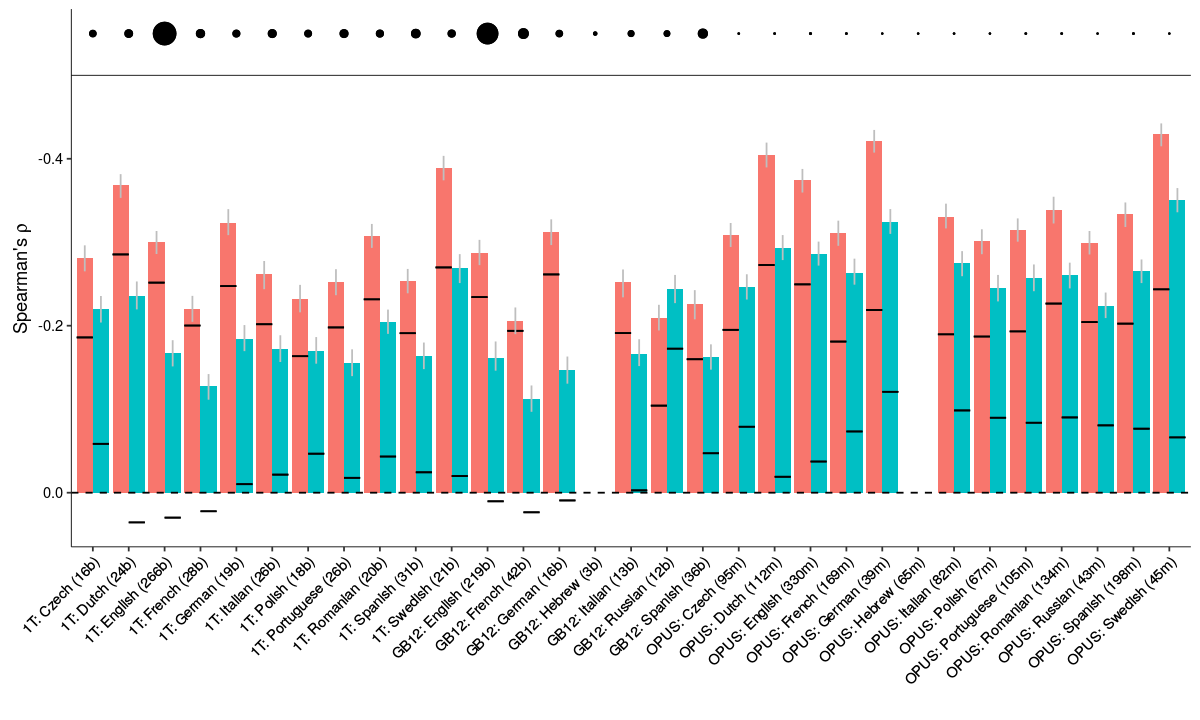

In [50]:
lv_list = c("Frequency")
sv_list = c("PIC - Phonemes","Number of Phonemes")
dodge <- position_dodge(width=0.9)
crosslinguistic_pic_phonemes = ggplot(subset(nem_combined, 
                                                     lv %in% lv_list &
                                                     sv %in% sv_list)
) + geom_bar(aes(x=languageLabel, y=singleCor, fill=sv),  stat='identity', position='dodge')  + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + geom_errorbar(aes(x=languageLabel, ymin=singleCor, ymax=singleCor, fill=sv), data= subset(partialsDF_combined, (lv %in% lv_list) & (sv %in% sv_list) ), position='dodge'
 ) + theme(panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), axis.line.x = element_line(color="black", size = .25),
    axis.line.y = element_line(color="black", size = .25)) + geom_hline(aes(yintercept = 0), linetype = 'dashed') + ylab(expression(paste("Spearman's ",rho))) + xlab(''
) +  theme(legend.position="none")  + geom_point(aes(x= languageLabel, y=-.55, size=numTokens)) + scale_size_area(
) + geom_hline(aes(yintercept = -.5), size=.25) +  geom_linerange(aes(x=languageLabel, 
ymin=lower, ymax=upper, fill=sv), position=dodge, colour='gray') + scale_y_continuous( breaks = seq(.1,-5,-.1)) + scale_y_reverse()


pdf('figures/crosslinguistic-pic-phonemes.pdf', width=10, height=5)
print(crosslinguistic_pic_phonemes)
dev.off()

options(repr.plot.width=10, repr.plot.height=6, jupyter.plot_mimetypes = 'image/png')
print(crosslinguistic_pic_phonemes)

# Comparison with Piantadosi et al. (2011)

In [54]:
nem_combined_google = subset(nem_combined, dataset != 'OPUS')
col_red = "#f37671" #unigram ~ ss
col_green = '#32bfc3' #  unigram ~ nchar
col_yellow = "#E69F00" # trigram ~ nchar
col_gray = "#8a8a8a" # trigram ~ ss

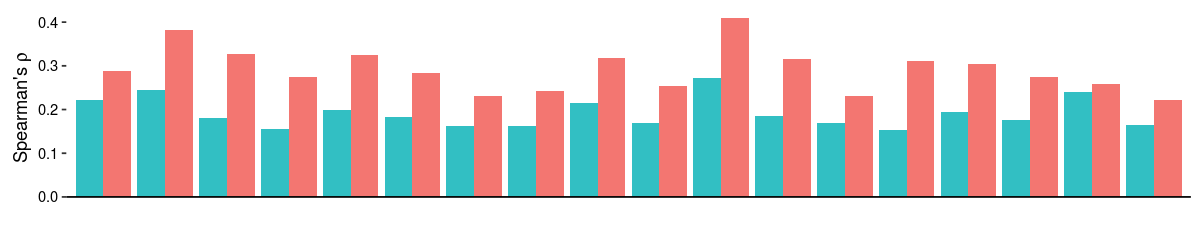

In [56]:
#(unigram ~ ss; RED) > (unigram ~ nchar; GREEN) -- Same as crosslinguistic plot
options(repr.plot.width=10, repr.plot.height=2, jupyter.plot_mimetypes = 'image/png')

p1 = ggplot(subset(nem_combined_google, ((lv == 'Unigram Surprisal' & sv == 'Number of Characters') |(lv =='Unigram Surprisal' & sv =='PIC - Characters'))
)) + geom_bar(aes(x=languageLabel, y=singleCor, fill=sv_lv),  stat='identity', position='dodge')  + scale_fill_manual(
values=c(col_green, col_red)) + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme( axis.line = element_line(colour = "black"),panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), legend.position="None") + geom_hline(aes(yintercept = 0)) + ylab(expression(paste("Spearman's ",rho))) + xlab('') + scale_x_discrete(breaks=NULL)

print(p1)


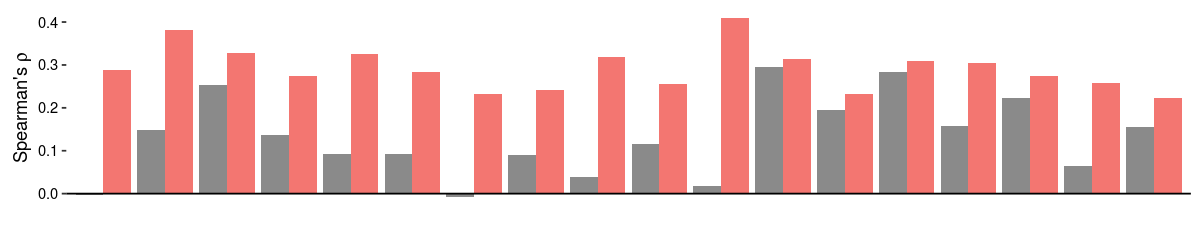

In [57]:
#(unigram ~ ss; RED) > (trigram ~ ss; gray) #SS is more strongly linked to unigram probability
nem_combined$sv_lv = paste(nem_combined$sv, nem_combined$lv)
options(repr.plot.width=10, repr.plot.height=2, jupyter.plot_mimetypes = 'image/png')
p2 = ggplot(subset(nem_combined_google, sv =='PIC - Characters' & lv %in% c('Trigram Surprisal',
'Unigram Surprisal'))) + geom_bar(aes(x=languageLabel, 
y=singleCor, fill=sv_lv),  stat='identity', position='dodge'
)   + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme( axis.line = element_line(colour = "black"),panel.background = element_blank(
), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
colour = "black"), legend.position="None") + geom_hline(aes(yintercept = 0)) + ylab(expression(paste("Spearman's ",
rho))) + xlab('') + scale_x_discrete(breaks=NULL) + scale_fill_manual( values=c(col_gray, col_red))
p2

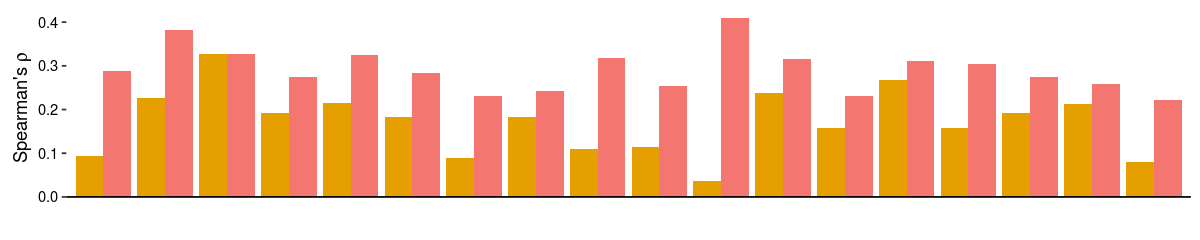

In [59]:
#(unigram ~ ss; RED) > (trigram ~ nchar; YELLOW) #better than nchar ~ trigram relation
nem_combined_google$sv_lv = paste(nem_combined_google$sv, nem_combined_google$lv)
options(repr.plot.width=10, repr.plot.height=2, jupyter.plot_mimetypes = 'image/png')
p3 = ggplot(subset(nem_combined_google, ((lv == 'Trigram Surprisal' & sv == 'Number of Characters') |(lv =='Unigram Surprisal' & sv =='PIC - Characters'
)))) + geom_bar(aes(x=languageLabel, y=singleCor, fill=sv_lv),  stat='identity', position='dodge')  + theme(axis.text.x = element_text(angle = 45, hjust = 1
)) + scale_fill_manual( values=c(col_yellow, col_red)
) + theme( axis.line = element_line(colour = "black"),panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), legend.position="None") + geom_hline(aes(yintercept = 0)) + ylab(expression(paste("Spearman's ",rho))) + xlab('') + scale_x_discrete(breaks=NULL)
p3

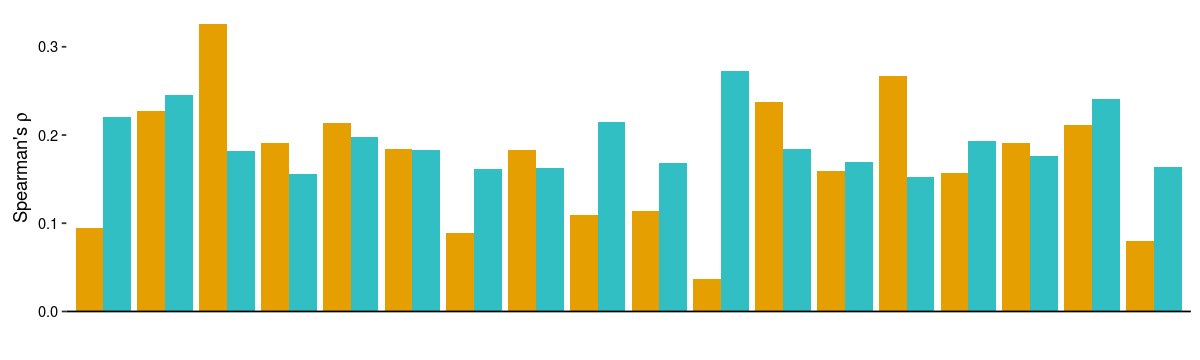

In [60]:
#(nchar ~ unigram; GREEN) > (nchar ~ trigram; YELLOW): P11 results don't hold except for large datasets
options(repr.plot.width=10, repr.plot.height=3, jupyter.plot_mimetypes = 'image/png')
p4 = ggplot(subset(nem_combined_google, ((lv == 'Unigram Surprisal' & sv == 'Number of Characters') |(lv =='Trigram Surprisal' & sv =='Number of Characters'))
)) + geom_bar(aes(x=languageLabel, y=singleCor, fill=sv_lv),  stat='identity', position='dodge')  + scale_fill_manual(
values=c(col_yellow, col_green)) + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme( axis.line = element_line(colour = "black"),panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), legend.position="None") + geom_hline(aes(yintercept = 0)) + ylab(expression(paste("Spearman's ",rho))) + xlab('') + xlab('') + scale_x_discrete(breaks=NULL)
p4

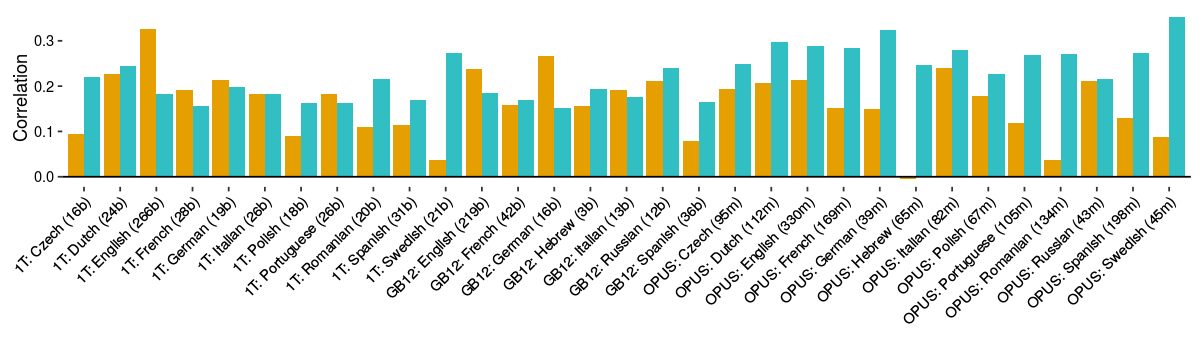

In [62]:
#Dummy plot for labels
options(repr.plot.width=10, repr.plot.height=3, jupyter.plot_mimetypes = 'image/png')
p5 = ggplot(subset(nem_combined, ((lv == 'Unigram Surprisal' & sv == 'Number of Characters') |(lv =='Trigram Surprisal' & sv =='Number of Characters'))
)) + geom_bar(aes(x=languageLabel, y=singleCor, fill=sv_lv),  stat='identity', position='dodge')  + scale_fill_manual(
values=c(col_yellow, col_green)) + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme( axis.line = element_line(colour = "black"),panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), legend.position="None") + geom_hline(aes(yintercept = 0)) + ylab('Correlation') + xlab('') + xlab('') 
p5

Loading required package: grid


png 
  2

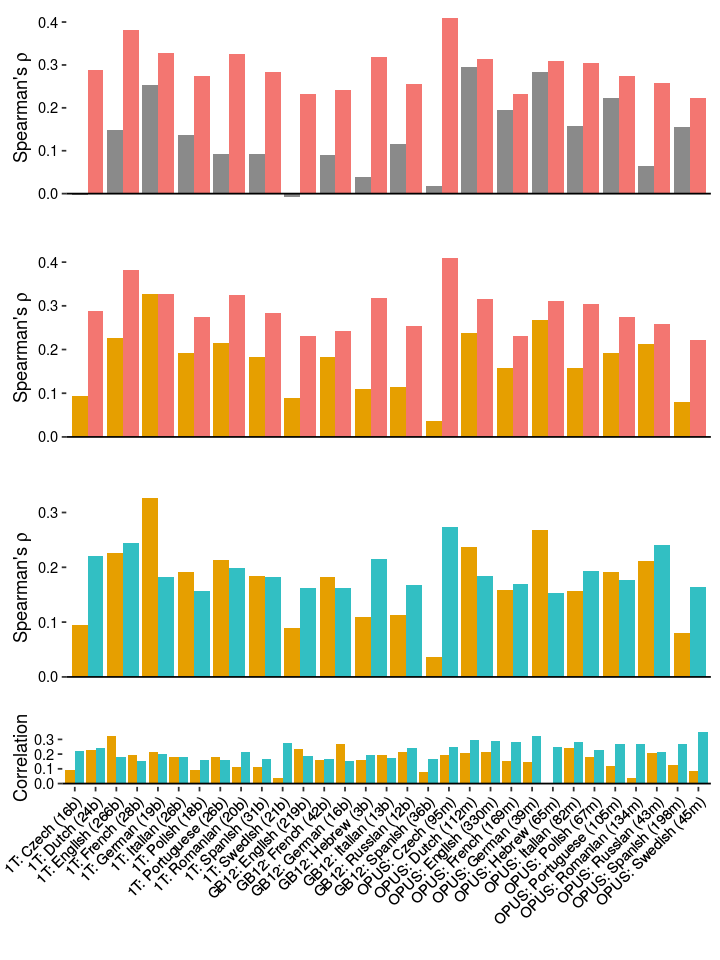

In [63]:
#tile p1 - p4 vertically
options(repr.plot.width=6, repr.plot.height=8, jupyter.plot_mimetypes = 'image/png')
mp = multiplot(p2, p3, p4,p5, cols=1) # p2, p3, p4,p5,

pdf('figures/comparison_with_p11_results.pdf', width=6, height=8)
multiplot(p2, p3, p4,p5, cols=1)
dev.off() 

# Plotting PIC, holding Length Constant  

In [66]:
eng = subset(books2012_withoutEndMarker[[which(books2012_languages == 'eng-all')]][['df']], !is.infinite(unigramSurprisal))
eng$logFrequency = log(eng$frequency)
#sample based on the frequency quantile
eng$freq_group =  ceiling(ecdf(eng$ipa_ss)(eng$ipa_ss)*50)

lengthOfInterest = 7
df = subset(eng, ipa_n == lengthOfInterest)
df$length = 7
dataset = do.call('rbind', lapply(split(df, df$freq_group), function(sub_df){
    return(sub_df[sample(1:nrow(sub_df),1),])
}))
print(nrow(dataset))

[1] 49


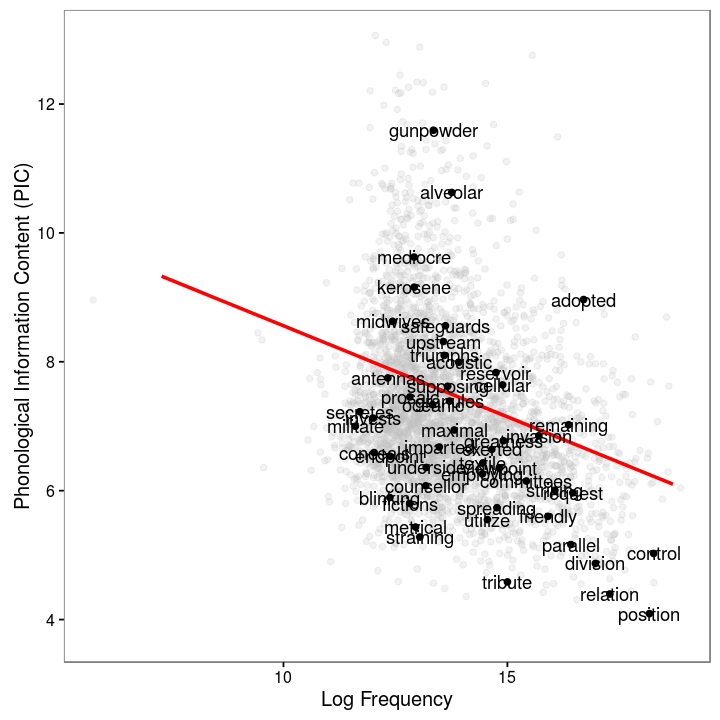

In [67]:
options(repr.plot.width=5, repr.plot.height=5, jupyter.plot_mimetypes = 'image/png')
dfss_lengthConstant = ggplot(data=subset(eng, ipa_n==7)) + geom_point(aes(x=log(frequency),y=ipa_ss),colour='gray',
alpha=.2) + stat_smooth(data=subset(eng, ipa_n==8), aes(x=log(frequency),y=ipa_ss),method = "lm", colour='red', se=F
) + geom_point(data =dataset, aes(x=log(frequency), y=ipa_ss)) +xlab(bquote('Log Frequency'))  + ylab(
'Phonological Information Content (PIC)') + theme_bw() + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black")) + coord_cartesian(ylim=c(3.8,13)) + geom_text(
data=dataset, aes(x=log(frequency), y=ipa_ss, label=word)) 

options(repr.plot.width=6, repr.plot.height=6, jupyter.plot_mimetypes = 'image/png')
print(dfss_lengthConstant)

# Monomorphemic Words From CELEX

In [69]:
languages = c('ENGLISH','DUTCH', 'GERMAN')
monomorphemic_withoutEndMarker = lapply(languages, function(language){getScoresForLanguage('results', 'Google1T','25000',language, endMarker=F,  corMethod='spearman', opusFilter=T, morphSimple=T)})

[1] "original number in ENGLISH: 49905"
[1] "Limiting analysis"
[1] 52456     2
[1] "Filtering..."
[1] "filtered number in ENGLISH: 25000"
[1] "Getting correlations"
 [1] "word"                      "opusCount"                
 [3] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
 [5] "frequency"                 "numContexts"              
 [7] "retrievalTime"             "index"                    
 [9] "ipa"                       "ipa_ss_array"             
[11] "ipa_ss"                    "ipa_n"                    
[13] "ortho"                     "ortho_ss_array"           
[15] "ortho_ss"                  "ortho_n"                  
[17] "character"                 "character_ss_array"       
[19] "character_ss"              "character_n"              
[21] "log_ortho_n"               "endMarker"                
[23] "trigramSurprisal"          "prob"                     
[25] "unigramSurprisal"          "log_ipa_n"                
[27] "log_character_n"           "languag

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


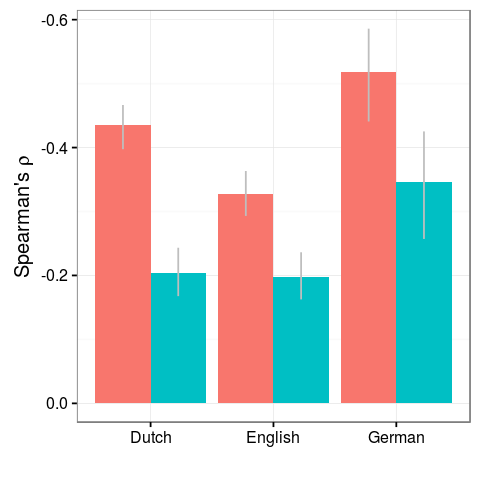

In [74]:
options(repr.plot.width=4, repr.plot.height=4, jupyter.plot_mimetypes = 'image/png')
nem_monomorph = do.call('rbind', lapply(monomorphemic_withoutEndMarker, function(x){x$score}))
lv_list = c("frequency")
sv_list = c("ortho_n","ipa_ss")
dodge <- position_dodge(width=0.9)
ggplot(subset(nem_monomorph, lv %in% lv_list & sv %in% sv_list)) + geom_bar(aes(x=language, y=singleCor, fill=sv),  stat='identity', position='dodge')  + theme(axis.text.x = element_text(angle = 45, hjust = 1)
)+ scale_y_continuous( breaks = seq(.1,-5,-.1)) + scale_y_reverse(
) + theme_bw() + ylab(expression(paste("Spearman's ",rho))) + xlab(''
 ) +  theme(legend.position="none") +  geom_linerange(aes(x=language,  ymin=lower, ymax=upper, fill=sv), position=dodge, colour='gray') 

In [71]:
languages = c('en','nl', 'de')
monomorph_token_withoutEndMarker = lapply(languages, function(language){getScoresForLanguage('results', 'OPUS','25000',language, endMarker=F,  corMethod='spearman', opusFilter=T, morphSimple=T)})

[1] "original number in en: 49900"
[1] "Limiting analysis"
[1] 52456     2
[1] "Filtering..."
[1] "filtered number in en: 25000"
[1] "Getting correlations"
 [1] "word"                      "opusCount"                
 [3] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
 [5] "frequency"                 "numContexts"              
 [7] "retrievalTime"             "index"                    
 [9] "ipa"                       "ipa_ss_array"             
[11] "ipa_ss"                    "ipa_n"                    
[13] "ortho"                     "ortho_ss_array"           
[15] "ortho_ss"                  "ortho_n"                  
[17] "character"                 "character_ss_array"       
[19] "character_ss"              "character_n"              
[21] "log_ortho_n"               "endMarker"                
[23] "trigramSurprisal"          "prob"                     
[25] "unigramSurprisal"          "log_ipa_n"                
[27] "log_character_n"           "language"        

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


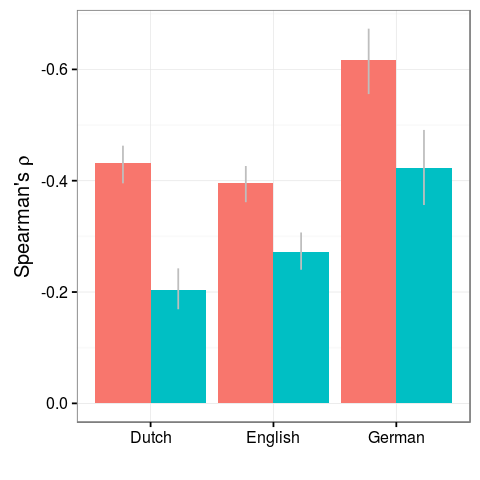

In [75]:
options(repr.plot.width=4, repr.plot.height=4, jupyter.plot_mimetypes = 'image/png')
token_nem_monomorph = do.call('rbind', lapply(monomorph_token_withoutEndMarker, function(x){x$score}))
lv_list = c("frequency")
sv_list = c("ortho_n","ipa_ss",'token_ipa_ss')
dodge <- position_dodge(width=0.9)
ggplot(subset(token_nem_monomorph, lv %in% lv_list & sv %in% sv_list)) + geom_bar(aes(x=language, y=singleCor, fill=sv),  stat='identity', position='dodge')  + theme(axis.text.x = element_text(angle = 45, hjust = 1)
)+ scale_y_continuous( breaks = seq(.1,-5,-.1)) + scale_y_reverse(
) + theme_bw() + ylab(expression(paste("Spearman's ",rho))) + xlab(''
 ) +  theme(legend.position="none") +  geom_linerange(aes(x=language,  ymin=lower, ymax=upper, fill=sv), position=dodge, colour='gray') 

# OPUS: Token-weighted Models

In [76]:
opus_languages = c('en','ru','he','de','fr','es','cs','pt', 'pl','ro','sv','it','nl')
token_opus_withoutEndMarker = lapply(1:length(opus_languages), function(i){getScoresForLanguage('token_results','OPUS','25000',opus_languages[i], endMarker=F,  corMethod='spearman', opusFilter=T)})
names(token_opus_withoutEndMarker) = opus_languages

[1] "original number in en: 49900"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in en: 25000"
[1] "Getting correlations"
 [1] "word"                      "opusCount"                
 [3] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
 [5] "frequency"                 "numContexts"              
 [7] "retrievalTime"             "index"                    
 [9] "ipa"                       "ipa_ss_array"             
[11] "ipa_ss"                    "ipa_n"                    
[13] "ortho"                     "ortho_ss_array"           
[15] "ortho_ss"                  "ortho_n"                  
[17] "character"                 "character_ss_array"       
[19] "character_ss"              "character_n"              
[21] "token_ipa"                 "token_ipa_ss_array"       
[23] "token_ipa_ss"              "token_ipa_n"              
[25] "token_character"           "token_character_ss_array" 
[27] "token_character_ss"        "token_character_n"        
[29] "

In [77]:
token_opus.nem = do.call('rbind', lapply(token_opus_withoutEndMarker, function(x){x$score}))
token_opus.nem = subset(token_opus.nem, sv %in% c('ipa_ss', 'ipa_n','character_ss','ortho_n'))
#opus.nem$sv = factor(opus.nem$sv, levels=c('ipa_ss','character_ss','ipa_n','ortho_n'))
#Better word-level metric names
token_opus.nem$sv = factor(token_opus.nem$sv)
levels(token_opus.nem$sv)[levels(token_opus.nem$sv)=="ipa_ss"] = "PIC - Phonemes"
levels(token_opus.nem$sv)[levels(token_opus.nem$sv)=="ipa_n"] = "Number of Phonemes"
levels(token_opus.nem$sv)[levels(token_opus.nem$sv)=="character_ss"] = "PIC - Characters"
levels(token_opus.nem$sv)[levels(token_opus.nem$sv)=="ortho_n"] = "Number of Characters"

token_opus.nem$lv = factor(token_opus.nem$lv)
levels(token_opus.nem$lv)[levels(token_opus.nem$lv)=="unigramSurprisal"] = "Unigram Surprisal"
levels(token_opus.nem$lv)[levels(token_opus.nem$lv)=="trigramSurprisal"] = "Trigram Surprisal"
levels(token_opus.nem$lv)[levels(token_opus.nem$lv)=="frequency"] = "Frequency"

token_opus.nem = merge(token_opus.nem,opus_corpusCounts, by='language')
token_opus.nem$sv = factor(token_opus.nem$sv, levels=c('PIC - Phonemes','Number of Phonemes',"PIC - Characters","Number of Characters"))
token_opus.nem$lv = factor(token_opus.nem$lv, levels=c("Unigram Surprisal","Trigram Surprisal","Frequency"))
token_opus.nem$language = as.factor(sapply(token_opus.nem$language, simpleCap))
token_opus.nem$languageCount = sapply(1:length(token_opus.nem$language), function(x){paste0(token_opus.nem$language[x], ' (', round(token_opus.nem$numTokens[x] / 1000000,0),'m)' )})

In [82]:
source('ss_analysis.R')
token_opus_wordLengthPartialedOutScores = do.call('rbind',lapply(token_opus_withoutEndMarker,function(language){partialCor(language,'token_ipa_ss','token_ipa_n')}))
token_opus_wordLengthPartialedOutScores$sv = "Number of Phonemes"

token_opus_ssPartialedOutScores = do.call('rbind',lapply(token_opus_withoutEndMarker,function(language){partialCor(language,'token_ipa_n','token_ipa_ss')}))
token_opus_ssPartialedOutScores$sv = "PIC - Phonemes"

token_opus_char_wordLengthPartialedOutScores = do.call('rbind',lapply(token_opus_withoutEndMarker,function(language){partialCor(language,'token_character_ss','ortho_n')}))
token_opus_char_wordLengthPartialedOutScores$sv = "Number of Characters"

token_opus_char_ssPartialedOutScores = do.call('rbind',lapply(token_opus_withoutEndMarker,function(language){partialCor(language,'ortho_n','token_character_ss')}))
token_opus_char_ssPartialedOutScores$sv = "PIC - Characters"

token_opus_nem_unique = token_opus.nem[!duplicated(token_opus.nem$languageCount),]
token_opus_partialsDF = merge(rbind(token_opus_wordLengthPartialedOutScores, token_opus_ssPartialedOutScores, token_opus_char_wordLengthPartialedOutScores, token_opus_char_ssPartialedOutScores), token_opus_nem_unique[,c('language','languageCount')])
token_opus_partialsDF$sv = factor(opus_partialsDF$sv)

[1] "Processing language: English"
[1] "token_ipa_ss"
[1] "token_ipa_n"
[1] 25000
[1] "24261 items after removing infinites"
[1] "Processing language: Russian"
[1] "token_ipa_ss"
[1] "token_ipa_n"
[1] 25000
[1] "25000 items after removing infinites"
[1] "Processing language: Hebrew"
[1] "voi or toPartial not in data frame"
[1] "Processing language: German"
[1] "token_ipa_ss"
[1] "token_ipa_n"
[1] 25000
[1] "24964 items after removing infinites"
[1] "Processing language: French"
[1] "token_ipa_ss"
[1] "token_ipa_n"
[1] 25000
[1] "24998 items after removing infinites"
[1] "Processing language: Spanish"
[1] "token_ipa_ss"
[1] "token_ipa_n"
[1] 25000
[1] "25000 items after removing infinites"
[1] "Processing language: Czech"
[1] "token_ipa_ss"
[1] "token_ipa_n"
[1] 25000
[1] "25000 items after removing infinites"
[1] "Processing language: Portuguese"
[1] "token_ipa_ss"
[1] "token_ipa_n"
[1] 25000
[1] "24999 items after removing infinites"
[1] "Processing language: Polish"
[1] "token_ipa_ss

In [83]:
token_opus_datasets = do.call('rbind',lapply(token_opus_withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
token_opus_datasets$dataset = 'OPUS'       
token_opus_datasets$dataset_language = paste0(token_opus_datasets$dataset, ': ', token_opus_datasets$language)

Warning message:
: Removed 2 rows containing missing values (geom_linerange).

png 
  2

Warning message:
: Removed 2 rows containing missing values (geom_linerange).

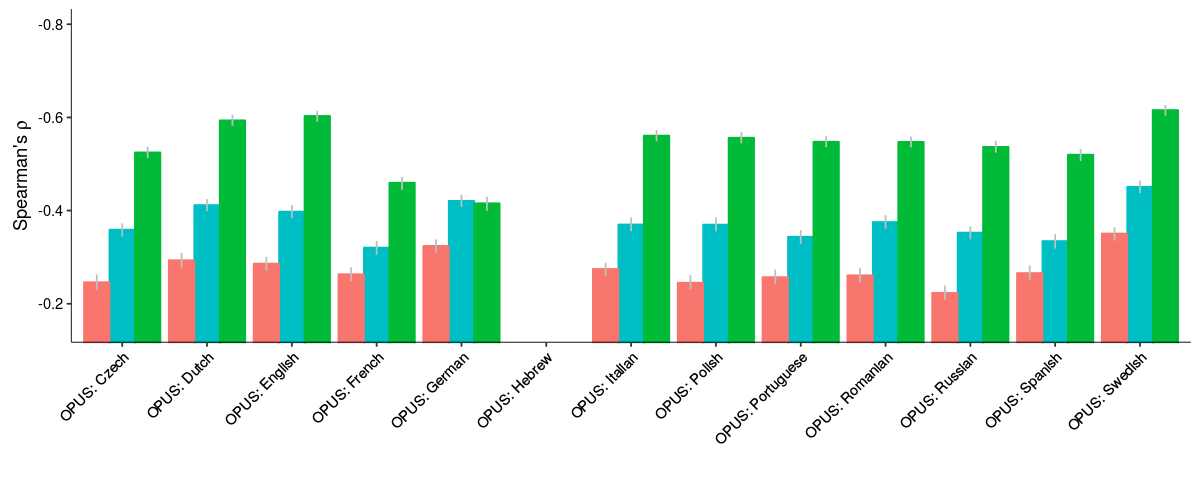

In [84]:
options(repr.plot.width=10, repr.plot.height=4, jupyter.plot_mimetypes = 'image/png')
cd_selected = subset(token_opus_datasets, lv =='frequency' & sv %in% c('token_ipa_ss', 'ipa_ss','ipa_n'))

token_crosslinguistic_pic_phonemes = ggplot(cd_selected) + geom_bar(aes(x=dataset_language, y=singleCor, 
fill=sv, colour=sv), stat='identity', position='dodge') + scale_fill_manual(values=c("#F8766D", "#00BFC4", "#00BA38")
) + scale_color_manual(values=c("#F8766D", "#00BFC4", "#00BA38")
)+ coord_cartesian(ylim = c(-.15, -.8)) + scale_y_reverse(
) + geom_linerange(aes(x=dataset_language, ymin=lower, ymax=upper, fill=sv, group=sv) , position=position_dodge(.9),colour='gray'
) + xlab('') + ylab(expression(paste("Spearman's ",rho))) + theme(
    panel.background = element_blank( ),
    axis.text.y = element_text( colour = "black"),
    axis.line.x = element_line(color="black", size = .25),
    axis.line.y = element_line(color="black", size = .25),
    axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")
)  + ylab(expression(paste("Spearman's ",rho))) + xlab(''
) +  theme(legend.position="none")

pdf('figures/token_crosslinguistic_pic_phonemes.pdf', width=10, height=5)
print(token_crosslinguistic_pic_phonemes)
dev.off()

print(token_crosslinguistic_pic_phonemes)

png 
  2

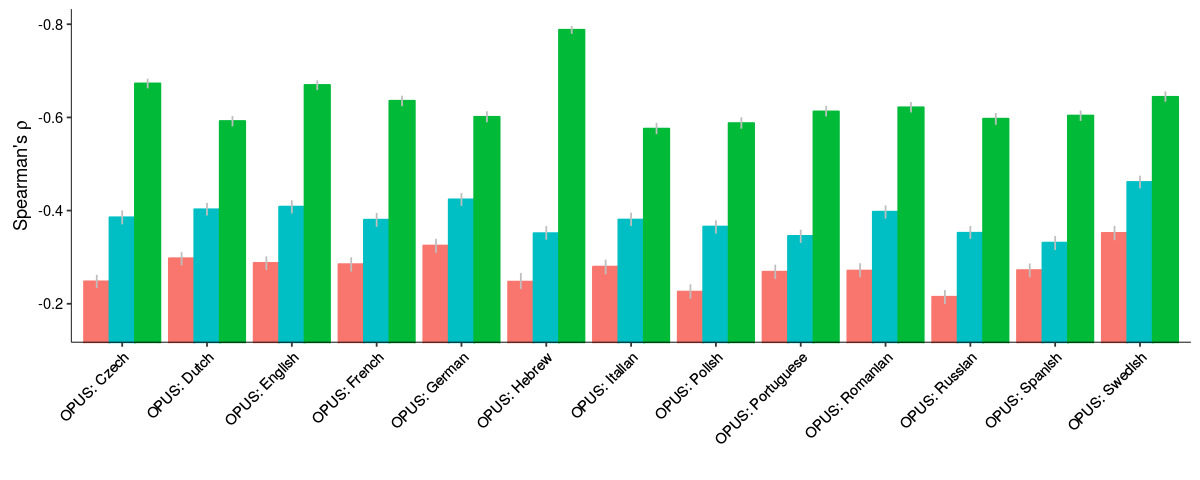

In [85]:
options(repr.plot.width=10, repr.plot.height=4, jupyter.plot_mimetypes = 'image/png')
cd_selected = subset(token_opus_datasets, lv =='frequency' & sv %in% c('token_character_ss', 'character_ss','ortho_n'))
cd_selected$sv = factor(cd_selected$sv, levels(factor(cd_selected$sv))[c(2,1,3)])

token_crosslinguistic_pic_characters = ggplot(cd_selected) + geom_bar(aes(x=dataset_language, y=singleCor, 
fill=sv, colour=sv), stat='identity', position='dodge') + scale_fill_manual(values=c("#F8766D", "#00BFC4", "#00BA38")
) + scale_color_manual(values=c("#F8766D", "#00BFC4", "#00BA38")
)+ coord_cartesian(ylim = c(-.15, -.8)) + scale_y_reverse(
) + geom_linerange(aes(x=dataset_language, ymin=lower, ymax=upper, fill=sv, group=sv) , position=position_dodge(.9),colour='gray'
) + xlab('') + ylab(expression(paste("Spearman's ",rho))) + theme(
    panel.background = element_blank( ),
    axis.text.y = element_text( colour = "black"),
    axis.line.x = element_line(color="black", size = .25),
    axis.line.y = element_line(color="black", size = .25),
    axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")
)  + ylab(expression(paste("Spearman's ",rho))) + xlab(''
) +  theme(legend.position="none")

pdf('figures/token_crosslinguistic_pic_characters.pdf', width=10, height=5)
print(token_crosslinguistic_pic_characters)
dev.off()

print(token_crosslinguistic_pic_characters)

In [ ]:
#save.image('cross-linguistic-pic.RData')